# Descripción de un bucle de control

Un bucle de control por retroalimentación se compone de un proceso, el
sistema de medición de la variable controlada, el sistema de control y
el elemento final de control. Cada uno de estos elementos tiene su propia dinámica, que vendrá descrita por una función de transferencia.

En este capítulo se explicará como se puede encontrar la función de
transferencia de todo un lazo de control a partir de las funciones de
transferencia de cada uno de los elementos del lazo. El medidor, el
proceso y el elemento final de control serán habitualmente sistemas
lineales de primer o de segundo orden, como los descritos en los dos
capítulos anteriores. Las funciones de transferencia de los
controladores se detallarán más adelante en este capítulo.

## Componentes de un lazo de control

El sistema de control se compone del controlador y del punto suma, que
compara la lectura del medidor con la consigna para dar el error
$\varepsilon$ que alimenta el controlador. El objetivo del sistema de
control es minimizar el error para que su valor sea lo más próximo a
cero. Además debe lograr eliminar los errores lo más rápidamente
posible.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagrama de bloques de un lazo de control por retroalimentación.
```

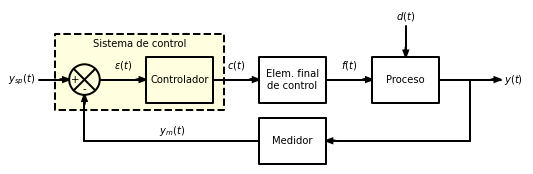

In [1]:
%config InLineBackend.figure_format = 'svg'
import schemdraw
from schemdraw import dsp

d = schemdraw.Drawing(unit=1, fontsize=10)


d += dsp.Arrow().label('$y_{sp}(t)$', 'left')
d += (sum := dsp.Mixer(W="+", S="-").anchor('W'))
d += dsp.Arrow().label('$\epsilon(t)$', 'top').right().length(1.5)
d += (control := dsp.Box(w=2.2, h=1.5).label('Controlador')).anchor('W')
d += dsp.Arrow().at(control.E).right().length(d.unit*1.5).label('$c(t)$', 'top')
d += (servo := dsp.Box(w=2.2, h=1.5).label('Elem. final\nde control')).anchor('W')
d += dsp.Arrow().at(servo.E).right().length(d.unit*1.5).label("$f(t)$", "top")
d += (proceso := dsp.Box(w=2.2, h=1.5).label('Proceso')).anchor('W')
d += dsp.Arrow().at(proceso.N).up().label("$d(t)$", "right").reverse()
d += dsp.Line().at(proceso.E).right()
d += (outp := dsp.Dot(radius=0))
d += dsp.Arrow().label('$y(t)$', 'right')
d += dsp.Line().down().length(2).at(outp.center)
d += dsp.Arrow().left().length(1.5+3.2)
d += (medidor := dsp.Box(w=2.2, h=1.5).label('Medidor').anchor('E'))
d += dsp.Line().at(medidor.W).left().tox(sum.S).label("$y_m(t)$", "top")
d += dsp.Arrow().up().to(sum.S)
d += dsp.Box(h=2.5, w=5.5, at=(3.3,1.5)).fill("lightyellow").linestyle("--").label("Sistema de control", "right", ofst=(0.5,0)).zorder(0)

d.draw()

En {numref}`%s <descripcion>` {ref}`descripcion` se describe cualitativamente un bucle de control por
retroalimentación, un intercambiador de calor en una planta de
pasteurización de leche. En este capítulo se describirá el bucle de una
manera más detallada.

```{figure} ./img/0.png
---
figclass: margin
align: left
name: lazo
---
Funciones de transferencia que intervienen en un lazo de control por retroalimentación.
``` 

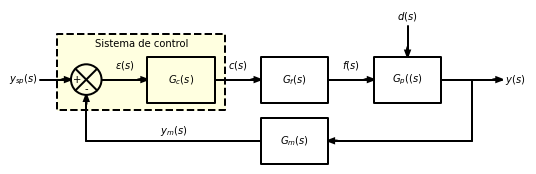

In [2]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().label('$y_{sp}(s)$', 'left')
d += (sum := dsp.Mixer(W="+", S="-").anchor('W'))
d += dsp.Arrow().label('$\epsilon(s)$', 'top').right().length(1.5)
d += (control := dsp.Box(w=2.2, h=1.5).label('$G_c(s)$')).anchor('W')
d += dsp.Arrow().at(control.E).right().length(d.unit*1.5).label('$c(s)$', 'top')
d += (servo := dsp.Box(w=2.2, h=1.5).label('$G_f(s)$')).anchor('W')
d += dsp.Arrow().at(servo.E).right().length(d.unit*1.5).label("$f(s)$", "top")
d += (proceso := dsp.Box(w=2.2, h=1.5).label('$G_p((s)$')).anchor('W')
d += dsp.Arrow().at(proceso.N).up().label("$d(s)$", "right").reverse()
d += dsp.Line().at(proceso.E).right()
d += (outp := dsp.Dot(radius=0))
d += dsp.Arrow().label('$y(s)$', 'right')
d += dsp.Line().down().length(2).at(outp.center)
d += dsp.Arrow().left().length(1.5+3.2)
d += (medidor := dsp.Box(w=2.2, h=1.5).label('$G_m(s)$').anchor('E'))
d += dsp.Line().at(medidor.W).left().tox(sum.S).label("$y_m(s)$", "top")
d += dsp.Arrow().up().to(sum.S)
d += dsp.Box(h=2.5, w=5.5, at=(3.3,1.5)).fill("lightyellow").linestyle("--").label("Sistema de control", "right", ofst=(0.5,0)).zorder(0)

d.draw()

El proceso, en este caso el intercambiador de calor, viene descrito por
la función de transferencia $G_p$. El proceso puede tener dos posibles
entradas: $f(t)$ que es la variable manipulable y $d (t)$ que
representa a las perturbaciones. Las perturbaciones pueden ser una
entrada en cualquier punto del lazo de control, pero normalmente son
debidas al proceso. La respuesta del proceso es la variable controlada
que normalmente se indicará como $y (t)$. Esta variable es la respuesta
global del sistema formado por todos los elementos del lazo de control.

El valor de la variable controlada se mide con un sensor, un termómetro
de resistencia de tipo Pt100 para el ejemplo, cuya dinámica viene
descrita por la función de transferencia $G_m$. Como salida de este
proceso se obtiene la variable controlada medida $y_m (t)$.

El valor de $y_m$ se compara con la consigna
$y_{sp} (t)$ para obtener el error
$\varepsilon (t)$. El valor de la consigna será normalmente cero, en el
caso de estar definido utilizando variables de desviación. Este error es
la entrada del controlador, cuya función de transferencia es $G_c$. Las
respuesta del controlador $c (t)$ es una intensidad de corriente o una
diferencia de presión según sea el sistema de transmisión de información
eléctrico o neumático.

Esta acción de control $c (t)$ modifica al elemento final de control
($G_f$), en ejemplo tratado es una válvula, para que cambie el valor de
la variable manipulable $f (t)$. El cambio de la variable manipulable
modifica el estado del proceso. Si el sistema de control funciona
correctamente este cambio de la variable controlada debe tender a
eliminar el error. En el caso de que lo que se haya producido haya sido
un cambio a la consigna, debe conducir al sistema al nuevo estado
estacionario deseado.

## Componentes de acción invesa

Aunque la mayoría de elementos del bucle de control son de acción
directa --el signo de la salida es el mismo de la entrada--, también
existen procesos de acción inversa. Los procesos de acción inversa
tienen una ganancia negativa. Un elemento de acción inversa presente en
todos los lazos de control es el comparador. En el comparador se produce una cambio de signo ya que para calcular el error se resta la variable medida a la consigna ({numref}`comparador` a)). Por este motivo se puede considerar al comparador como un elemento de acción inversa.

Se puede demostrar de manera muy sencilla que para que un lazo de
control pueda funcionar correctamente debe tener un número impar de
elementos de acción inversas, es decir, un número impar de cambios de
signo en el lazo de control. Si existe en el lazo de control un número
par de elementos de acción inversa se debe incluir un bloque -1 entre el comparador y el controlador ({numref}`comparador` b).


a)
```{figure} ./img/0.png
---
figclass: margin
align: left
name: comparador
---
Cómo se debe disponer el sistema de control cuando: a) El número de elementos de acción inversa en el lazo de control es cero o par, o b) cuando existe un elemento de acción inversa o su número es par.
```

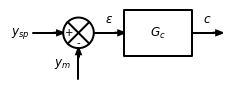

In [3]:
d1 = schemdraw.Drawing(unit=1, fontsize=12)

d1 += dsp.Arrow().label('$y_{sp}$', 'left')
d1 += (sum := dsp.Mixer(W="+", S="-").anchor("W"))
d1 += dsp.Arrow().down().at(sum.S).label("$y_m$").reverse()
d1 += dsp.Arrow().right().at(sum.E).label("$\epsilon$", "top")
d1 += (control := dsp.Box(w=2.2, h=1.5).label("$G_c$", "center").anchor("W"))
d1 += dsp.Arrow().right().at(control.E).label("$c$", "top")

d1.draw()

b)

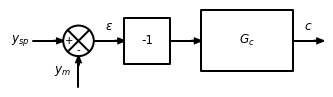

In [4]:
d2 = schemdraw.Drawing(unit=1, fontsize=12)

d2 += dsp.Arrow().label('$y_{sp}$', 'left')
d2 += (sum := dsp.Mixer(W="+", S="-").anchor("W"))
d2 += dsp.Arrow().down().at(sum.S).label("$y_m$").reverse()
d2 += dsp.Arrow().right().at(sum.E).label("$\epsilon$", "top")
d2 += (inv := dsp.Box(w=1.5, h=1.5).label("-1", "center").anchor("W"))
d2 += dsp.Arrow().right().at(inv.E)
d2 += (control := dsp.Box().label("$G_c$", "center").anchor("W"))
d2 += dsp.Arrow().right().at(control.E).label("$c$", "top")

d2.draw()

En este curso los bloques y procesos utilizados solo tienen una entrada
y una salida. En cambio el proceso en la {numref}`lazo` el proceso tiene dos entradas, la variable manipulable y las perturbaciones. Para evitar ese problema habitualmente el se considera que además del proceso existe una función de transferencia debida a las perturbaciones ($G_d$) que no forma parte del lazo de control. Realizando esa modificación el lazo de control queda como el mostrado en la {numref}`perturbaciones`.

```{figure} ./img/0.png
---
figclass: margin
align: left
name: perturbaciones
---
Lazo de control por retroalimentación mostrando la función de transferencia de las perturbaciones, $G_d(s)$.
```


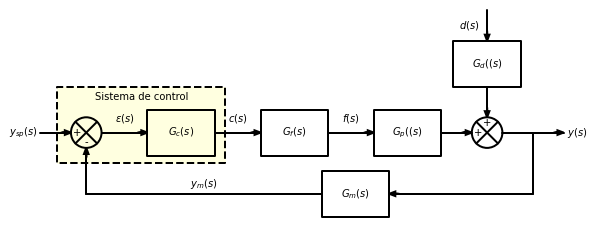

In [5]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().label('$y_{sp}(s)$', 'left')
d += (sum1 := dsp.Mixer(W="+", S="-").anchor('W'))
d += dsp.Arrow().label('$\epsilon(s)$', 'top').right().length(1.5)
d += (control := dsp.Box(w=2.2, h=1.5).label('$G_c(s)$')).anchor('W')
d += dsp.Arrow().at(control.E).right().length(d.unit*1.5).label('$c(s)$', 'top')
d += (servo := dsp.Box(w=2.2, h=1.5).label('$G_f(s)$')).anchor('W')
d += dsp.Arrow().at(servo.E).right().length(d.unit*1.5).label("$f(s)$", "top")
d += (proceso := dsp.Box(w=2.2, h=1.5).label('$G_p((s)$')).anchor('W')
d += dsp.Arrow().at(proceso.E).right()
d += (sum2 := dsp.Mixer(W="+", N="+").anchor("W"))
d += dsp.Line().at(sum2.E)
d.push()
d += dsp.Arrow().up().at(sum2.N).reverse()
d += (perturb := dsp.Box(w=2.2, h=1.5).label('$G_d((s)$')).anchor('S')
d += dsp.Arrow().up().at(perturb.N).label("$d(s)$", "top").reverse()
d.pop()
d += (outp := dsp.Dot(radius=0))
d += dsp.Arrow().label('$y(s)$', 'right')
d += dsp.Line().down().length(2).at(outp.center)
d += dsp.Arrow().left().length(1.5+3.2)
d += (medidor := dsp.Box(w=2.2, h=1.5).label('$G_m(s)$').anchor('E'))
d += dsp.Line().at(medidor.W).left().tox(sum1.S).label("$y_m(s)$", "top")
d += dsp.Arrow().up().to(sum.S)
d += dsp.Box(h=2.5, w=5.5, at=(3.3,1.5)).fill("lightyellow").linestyle("--").label("Sistema de control", "right", ofst=(0.5,0)).zorder(0)


d.draw()

## Forma canónica

Con frecuencia los lazos de control se expresan de manera simplificada
utilizando la forma canónica. Para ello es necesario tener en cuenta que $G_c$, $G_f$ y $G_p$ son tres funciones de transferencia en serie.

La función de transferencia entre la consigna y la salida es:

$$\frac{y (s)}{y_{sp} (s)} = \frac{G_c G_f G_p}{1 + G_c G_f G_p G_m}$$

La función de transferencia entre la perturbación y la salida es:

$$\frac{y (s)}{d (s)} = \frac{G_d}{1 + G_c G_f G_p G_m}$$

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Forma canónica de un bucle de control por retroalimentación.
```

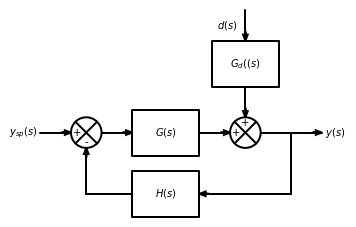

In [6]:
d = schemdraw.Drawing(unit=1, fontsize=10)

d += dsp.Arrow().label('$y_{sp}(s)$', 'left')
d += (sum1 := dsp.Mixer(W="+", S="-").anchor('W'))
d += dsp.Arrow().right()
d += (G := dsp.Box(w=2.2, h=1.5).label('$G(s)$')).anchor('W')
d += dsp.Arrow().at(G.E).right()
d += (sum2 := dsp.Mixer(W="+", N="+").anchor("W"))
d += dsp.Line().at(sum2.E)
d.push()
d += dsp.Arrow().up().at(sum2.N).reverse()
d += (perturb := dsp.Box(w=2.2, h=1.5).label('$G_d((s)$')).anchor('S')
d += dsp.Arrow().up().at(perturb.N).label("$d(s)$", "top").reverse()
d.pop()
d += (outp := dsp.Dot(radius=0))
d += dsp.Arrow().label('$y(s)$', 'right')
d += dsp.Line().down().length(2).at(outp.center)
d += dsp.Arrow().left().length(3)
d += (H := dsp.Box(w=2.2, h=1.5).label('$H(s)$').anchor('E'))
d += dsp.Line().at(H.W).left().tox(sum1.S)
d += dsp.Arrow().up().to(sum.S)

d.draw()

Por tanto la salida del lazo de control para un cambio simultáneo de la
consigna y de la perturbación será:
$$y (s) = \frac{G_c G_f G_p}{1 + G_c G_f G_p G_m} y_{sp} (s) +
   \frac{G_d}{1 + G_c G_f G_p G_m} d (s)$$